<a href="https://colab.research.google.com/github/d0k7/Intelligent-Data-Analysis-Lab-Code/blob/main/Intelligent_Data_Analysis_Lab_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Demonstration of different pre-processing techniques including missing value handling and data discretization on Adult dataset.**

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

# Load the Adult dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                'hours_per_week', 'native_country', 'income']
df = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)

# Display the first few rows of the dataset
print("Original dataset:")
print(df.head())

# Handling missing values
# Replace missing values in categorical columns with the most frequent value
categorical_cols = ['workclass', 'occupation', 'native_country']
for col in categorical_cols:
    most_frequent_value = df[col].mode()[0]
    df[col].fillna(most_frequent_value, inplace=True)

# Replace missing values in numerical columns with the mean
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Display the dataset after handling missing values
print("\nDataset after handling missing values:")
print(df.head())

# Data discretization using KBinsDiscretizer for 'age' column
age_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['age_discretized'] = age_discretizer.fit_transform(df[['age']])

# Display the dataset after data discretization
print("\nDataset after data discretization:")
print(df[['age', 'age_discretized']].head())


Original dataset:
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0         

**2. Demonstration of data reduction techniques including PCA and Histogram on Predict students' dropout and academic success dataset.**

Original Dataset:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                   

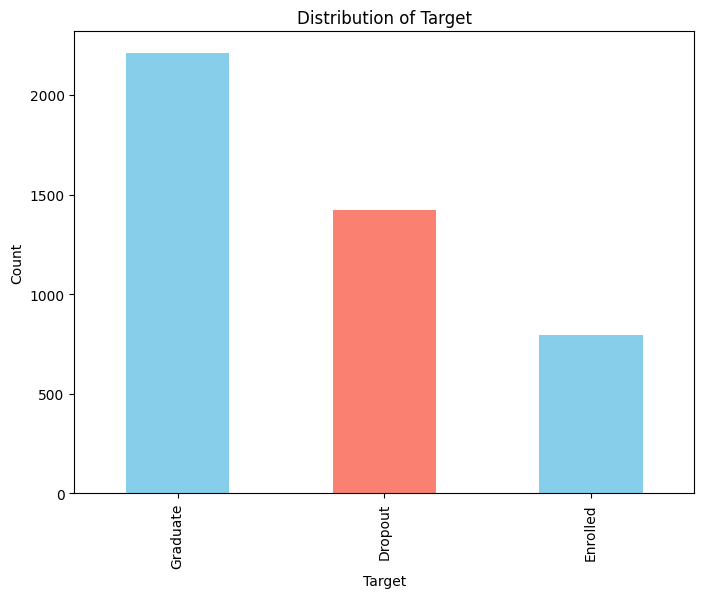

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with the actual file path or URL)
# Assuming the dataset has columns related to student information and the target column is 'Target'
df = pd.read_csv('/content/Dropout_Academic Success - Sheet1.csv')

#Dataset Link: https://drive.google.com/file/d/1wulhjBOEG6D3t_EEz4k2lESXu0P2OGPG/view?usp=sharing

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Separate features (X) and target variable (y) based on the actual target column name 'Target'
X = df.drop(['Target'], axis=1)
y = df[['Target']]

# Perform PCA for dimensionality reduction
# Let's reduce the dataset to 2 principal components for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Display the variance explained by each principal component
print("\nVariance explained by each principal component:")
print(pca.explained_variance_ratio_)

# Display the dataset after PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca = pd.concat([df_pca, y], axis=1)
print("\nDataset after PCA:")
print(df_pca.head())

# Plot a histogram to visualize the distribution of the 'Target' column
plt.figure(figsize=(8, 6))
df['Target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


**3. Demonstration of classification rules process on dataset of your choice using ID3 and J48 algorithm in Weka explorer.**

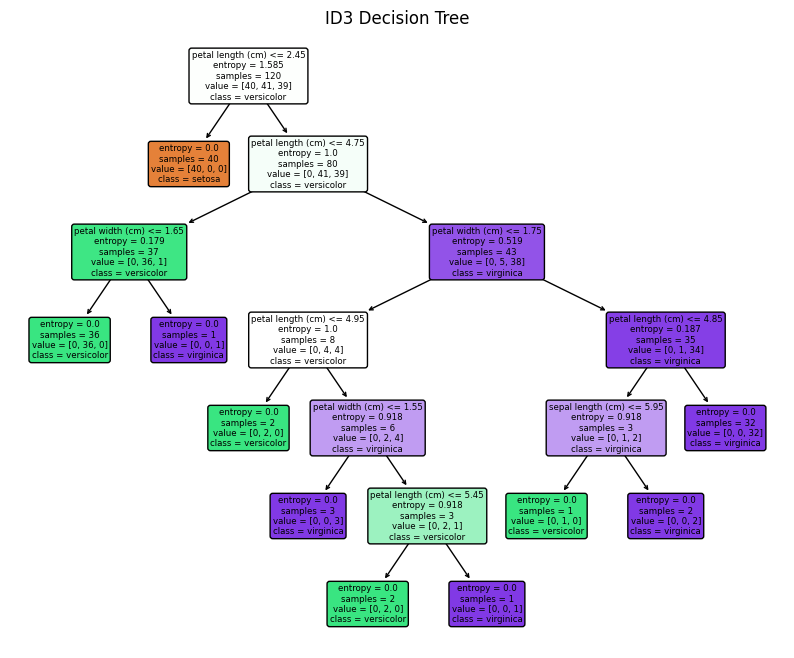

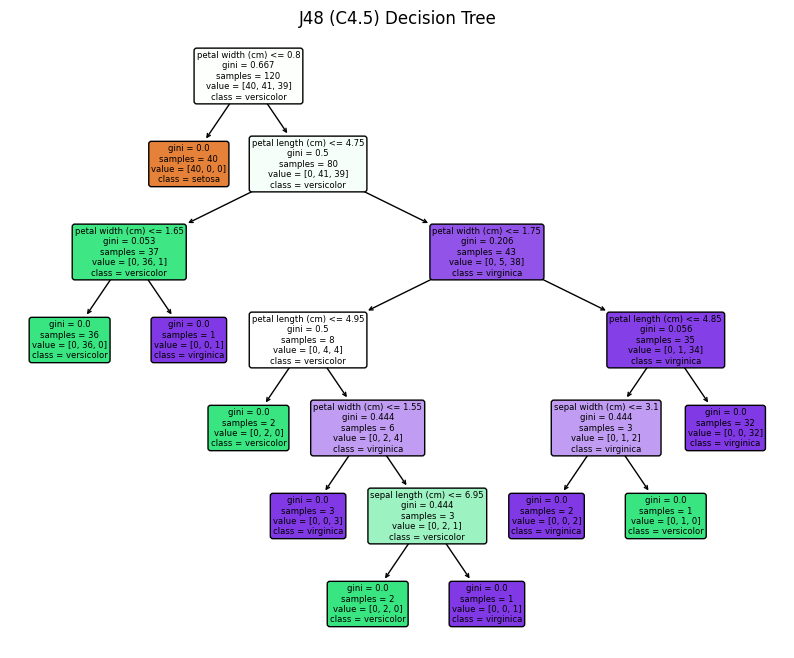

In [9]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load a sample dataset (replace it with your own dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeClassifier with ID3 algorithm
id3_classifier = DecisionTreeClassifier(criterion='entropy')
id3_classifier.fit(X_train, y_train)

# Visualize the ID3 decision tree
plt.figure(figsize=(10, 8))
plot_tree(id3_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title('ID3 Decision Tree')
plt.show()

# Create an instance of the DecisionTreeClassifier with J48 (C4.5) algorithm
j48_classifier = DecisionTreeClassifier(criterion='gini')  # Gini index is used by default, similar to C4.5
j48_classifier.fit(X_train, y_train)

# Visualize the J48 (C4.5) decision tree
plt.figure(figsize=(10, 8))
plot_tree(j48_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title('J48 (C4.5) Decision Tree')
plt.show()


**4. Implement the classification rules process on dataset of your choice using Naive Baye’s algorithm.**

In [12]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import load_iris  # Example dataset (you can replace it with your own dataset)

# Load a sample dataset (replace it with your own dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Naive Bayes classifier (Gaussian Naive Bayes for this example)
naive_bayes_classifier = GaussianNB()

# Train the model
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
nb_predictions = naive_bayes_classifier.predict(X_test)

# Evaluate the performance of the Naive Bayes model
accuracy = metrics.accuracy_score(y_test, nb_predictions)
print("Accuracy of Naive Bayes:", accuracy)


Accuracy of Naive Bayes: 1.0


**5. Build a Neural Network model to predict whether tumor is malignant or benign for Breast Cancer Wisconsin (Diagnostic) dataset using Python.**

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
# You can download the dataset from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
# Save the 'wdbc.data' file in the current working directory

# Define column names for the dataset
column_names = ['ID', 'Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area',
                'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points',
                'Mean Symmetry', 'Mean Fractal Dimension', 'SE Radius', 'SE Texture', 'SE Perimeter',
                'SE Area', 'SE Smoothness', 'SE Compactness', 'SE Concavity', 'SE Concave Points',
                'SE Symmetry', 'SE Fractal Dimension', 'Worst Radius', 'Worst Texture', 'Worst Perimeter',
                'Worst Area', 'Worst Smoothness', 'Worst Compactness', 'Worst Concavity',
                'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension']

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('/content/wdbc.data', header=None, names=column_names)

# Drop unnecessary columns (ID column is dropped here)
df = df.drop(['ID'], axis=1)

# Map 'M' (malignant) to 1 and 'B' (benign) to 0 in the 'Diagnosis' column
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and target variable (y)
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (normalize)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple Neural Network model using Keras
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
predictions = (model.predict(X_test_scaled) > 0.5).astype(int)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/10
15/15 [==============================] - 1s 19ms/step - loss: 0.6336 - accuracy: 0.6374 - val_loss: 0.4545 - val_accuracy: 0.8684
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.4054 - accuracy: 0.8725 - val_loss: 0.3115 - val_accuracy: 0.9123
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.2985 - accuracy: 0.9121 - val_loss: 0.2401 - val_accuracy: 0.9474
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.2408 - accuracy: 0.9231 - val_loss: 0.1975 - val_accuracy: 0.9474
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.2046 - accuracy: 0.9341 - val_loss: 0.1690 - val_accuracy: 0.9561
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1794 - accuracy: 0.9473 - val_loss: 0.1489 - val_accuracy: 0.9737
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1609 - accuracy: 0.9560 - val_loss: 0.1333 - val_accuracy: 0.9649
Epoch 8/10
15/15 [=

**6. Demonstration of clustering on dataset of your choice using simple K-means algorithm in python.**

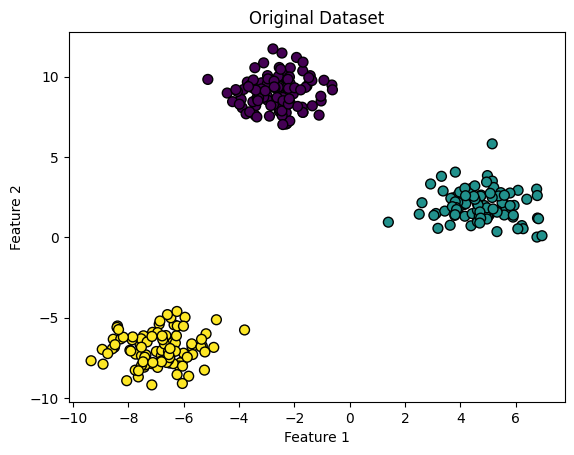

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


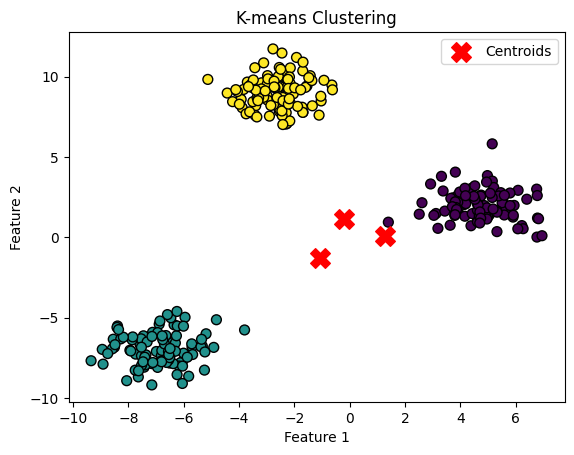

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset with three clusters (you can replace it with your own dataset)
# In this example, we'll use make_blobs to generate random data with three clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Visualize the original dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Original Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Standardize the data (normalize)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get cluster assignments and centroids
cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clustered dataset and centroids
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**7. Demonstration of clustering on dataset of your choice using simple DBSCAN algorithm in python.**

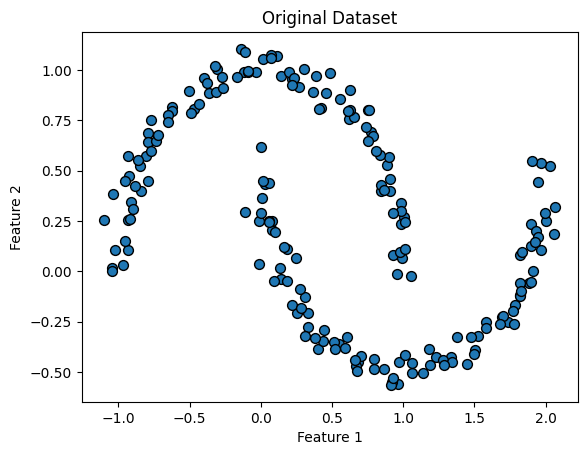

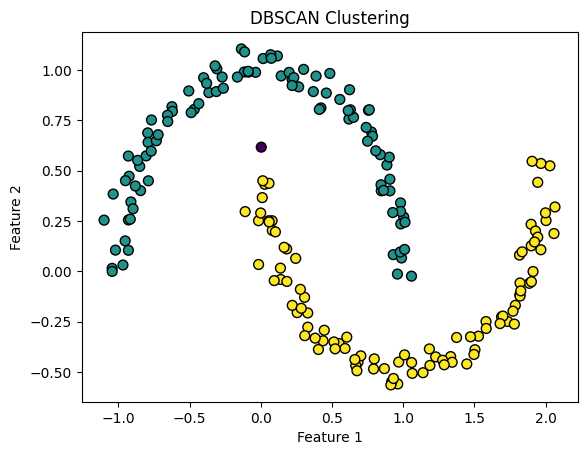

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset with two moons (you can replace it with your own dataset)
# In this example, we'll use make_moons to generate two crescent-shaped clusters
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Visualize the original dataset
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', s=50)
plt.title("Original Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Standardize the data (normalize)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

# Get cluster assignments
cluster_assignments = dbscan.labels_

# Visualize the clustered dataset
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', edgecolor='k', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**8. Demonstration of clustering on dataset of your choice using simple BIRCH algorithm python.**

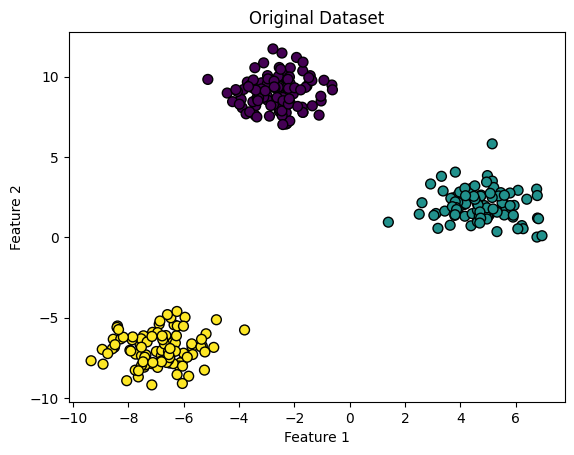

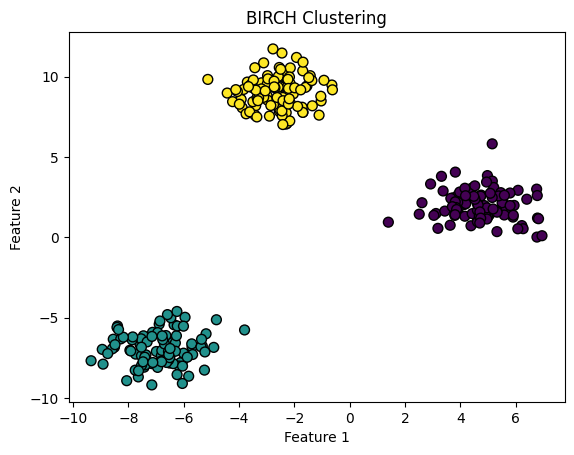

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset with three clusters (you can replace it with your own dataset)
# In this example, we'll use make_blobs to generate random data with three clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Visualize the original dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Original Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Standardize the data (normalize)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply BIRCH clustering
birch = Birch(threshold=0.5, n_clusters=3)
birch.fit(X_scaled)

# Get cluster assignments
cluster_assignments = birch.predict(X_scaled)

# Visualize the clustered dataset
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', edgecolor='k', s=50)
plt.title("BIRCH Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**9. Demonstration of association rule generation on Groceries dataset for Market Basket Analysis using Apriori algorithm.**

In [26]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the Groceries dataset
# The dataset can be found at: https://www.kaggle.com/heeraldedhia/groceries-dataset
# Download the 'Groceries_dataset.csv' file and save it in the current working directory
df = pd.read_csv('/content/Groceries_dataset.csv')

# Display the first few rows of the dataset
print(df[:5])

# Data preprocessing: Convert the dataset into a transaction format
# Each row represents a transaction with items as columns
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='items')

# Convert the transactions to a one-hot encoded format
transactions['items'] = transactions['items'].astype(str)  # Convert lists to strings
basket = transactions.pivot_table(index='Member_number', columns='items', aggfunc=lambda x: 1, fill_value=0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the generated association rules
print("Generated Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
    support                                      itemsets
0  0.011801  ((Date, ['other vegetables', 'whole milk']))
1  0.010262        ((Date, ['whole milk', 'whole milk']))
Generated Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


**10. Perform comparative analysis of Apriori and FP-Growth algorithms on Market Basket Analysis using Python.**

In [27]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth
import time

# Load the Groceries dataset
# The dataset can be found at: https://www.kaggle.com/heeraldedhia/groceries-dataset
# Download the 'Groceries_dataset.csv' file and save it in the current working directory
df = pd.read_csv('/content/Groceries_dataset.csv')

# Data preprocessing: Convert the dataset into a transaction format
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='items')

# Convert the transactions to a one-hot encoded format
transactions['items'] = transactions['items'].astype(str)
basket = transactions.pivot_table(index='Member_number', columns='items', aggfunc=lambda x: 1, fill_value=0)

# Measure time for Apriori algorithm
start_time = time.time()
apriori_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
apriori_time = time.time() - start_time

# Measure time for FP-Growth algorithm
start_time = time.time()
fpgrowth_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)
fpgrowth_time = time.time() - start_time

# Display the results
print("Apriori Execution Time:", apriori_time)
print("FP-Growth Execution Time:", fpgrowth_time)

# Additional analysis or comparisons can be performed based on your requirements


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori Execution Time: 0.35520410537719727
FP-Growth Execution Time: 1.4252495765686035
